In [1]:
execfile('setting.py')

In [2]:
%matplotlib inline 

In [3]:
def fun_data_layout(v_data):
    print("Data 구조:", v_data.shape)
    print()
    print("변수 : ", v_data.columns)
    print()
    #print(v_data.head()) <- Text format... 식별 불편
    # v_data.head()  <- 직접 적용 안됨

In [4]:
def dist(x):
    if x==0:
        return 0
    else: 
        return 1
    

In [5]:
df_raw = pd.read_csv(path1 + "보험2.csv")
df_raw.head()

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,CRDT_LOAN_CNT,TOT_CRLN_AMT,TOT_REPY_AMT,CRLN_OVDU_RATE,...,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT
0,1,공무원,5000,7000,4,1,0,0,0,0,...,9001,9001,9001,0,1,0,2,13,3,420001
1,2,자영업,5000,8000,4,2,0,0,0,0,...,24001,0,24001,0,0,0,2,121,0,0
2,3,주부,3000 미만,4000,4,1,0,0,0,0,...,15001,9001,0,3001,1,25,4,121,0,0
3,4,학생,3000 미만,10000,2,1,0,0,0,0,...,6001,3001,0,3001,1,25,4,61,0,0
4,5,공무원,4000,4000,4,1,0,0,0,0,...,21001,15001,21001,0,1,0,1,97,0,0


In [6]:
# train_test_split(데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train, df_test = train_test_split(df_raw, # 데이터
                                     test_size = 0.4, # test 데이터의 비율
                                     random_state = 1234)  # random state

print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (58837, 51)
test data size : (39225, 51)


In [7]:
df_raw.columns=['고객_ID', '직업', '추정소득', '가구추정소득', 
                '실가족원수', '보험가입가족원수', '신용대출건수', '**생명신용대출금액', 
                '**생명신용상환금액', '신용대출연체율','30일이내신용대출연체율', '최근1년신용대출연체율',
                '최초신용등급', '최근신용등급', '보험료연체율','최근1년보험료연체율' ,
               '평균약대율', '약관대출가능잔액','최근1년약대금액', '최근1년약대연체율',
                '비연금저축상품월납입보험료','연금저축상품월납입보험료','비가구연금저축상품월납입보험료', 
                '가구비연금저축상품월납입보험료','최대월납입보험료','기납입보험료','가구기납입보험료',
                '실효해지건수','최근1년 실효해지건수','자동이체실패월수','가구총지급보험금액', 
                '가구총보험금청구건수', '가구만기완납경험회수', '나이','생명비신용상환금액', 
                '대출연체여부취소' , '대출연체여부', '대출정보 현재 총 건수[은행]', '대출정보 현재 총건수[카드사/할부사/캐피탈]',
                '대출정보 현재 총 건수[2산업분류]', '대출정보 현재 총 건수[기타]','대출정보 현재 총 금액','대출정보 현재 총 금액[신용대출]',
                '대출정보 현재 총 금액[은행]','대출정보 현재 총 금액[카드사/할부사/캐피탈]','대출정보 최근 개설일로부터 현재까지 유지기간[신용대출]','대출정보 최근 개설일로부터 현재까지 유지기간[2산업분류-신용대출]',
                '개설정보 현재 신용개설 총 건수[신용카드]', '개설정보 최초 개설일로부터 현재까지 유지기간[신용카드]','보증정보 현재 보증 총 건수','보증정보 현재 보증 총 금액']
                

In [8]:
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성 
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,고객_ID,실가족원수,보험가입가족원수,신용대출건수,**생명신용대출금액,**생명신용상환금액,신용대출연체율,30일이내신용대출연체율,최근1년신용대출연체율,최초신용등급,...,최근1년보험료연체율_40미만,최근1년보험료연체율_50미만,최근1년보험료연체율_60미만,최근1년보험료연체율_90미만,최근1년보험료연체율_90이상,나이_20대,나이_30대,나이_40대,나이_50대,나이_60대 이상
0,1,4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,4,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,5,4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
df_raw["실효해지건수"]=df_raw["실효해지건수"].apply(dist)

In [10]:
# 설명변수, 목표변수 데이터 구분
df_raw_x = df_raw_dummy.drop("실효해지건수", axis = 1, inplace = False)
df_raw_y = df_raw_dummy["실효해지건수"] 

# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, # 설명변수 데이터
                                                                df_raw_y, # 목표변수 데이터
                                                                test_size = 0.4, # test 데이터의 비율
                                                                random_state = 1234)  # random state

In [11]:
    !pip install imblearn

In [12]:
# 샘플링 : Over-sampling 등
from imblearn.over_sampling import SMOTE

In [13]:
# 목표변수 빈도 확인
print(df_raw.value_counts(["실효해지건수"]),"\n")
print("실효해지건수=0 비율  ", df_raw.value_counts(df_raw["실효해지건수"]==0)/len(df_raw))

실효해지건수
0         89896
1          8166
dtype: int64 

실효해지건수=0 비율   실효해지건수
True     0.916726
False    0.083274
dtype: float64


<Figure size 1000x800 with 0 Axes>

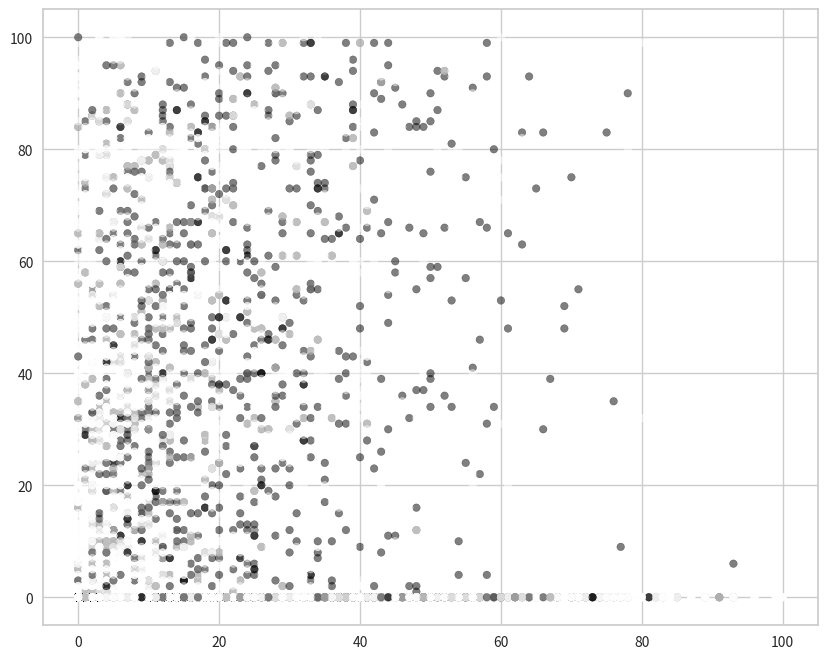

In [14]:
# 목표변수 산점도 확인
plt.figure(figsize=(10,8))
plt.scatter(df_raw['보험료연체율'],df_raw['신용대출연체율'],c=df_raw['실효해지건수'], s=30, alpha=0.5)
plt.show()

In [15]:
# Over-sampling 설정
sm = SMOTE(sampling_strategy='auto')

# train데이터를 이용한 Over-sampling
x_resampled, y_resampled = sm.fit_resample(df_train_x,df_train_y)

# 결과 확인
print('Over-Sampling 전:\n',df_train_y.value_counts(),"\n")
print('Over-Sampling 후 Train X: {}'.format(x_resampled.shape))
print('Over-Sampling 후 Train Y: {} \n'.format(y_resampled.shape))

print("Over-Sampling 후 '1':{}".format(sum(y_resampled==1)))
print("Over-Sampling 후 '0':{}".format(sum(y_resampled==0)))

Over-Sampling 전:
 0    53915
1     3728
2      799
3      240
4       95
5       29
7       16
6       15
Name: 실효해지건수, dtype: int64 

Over-Sampling 후 Train X: (431320, 92)
Over-Sampling 후 Train Y: (431320,) 

Over-Sampling 후 '1':53915
Over-Sampling 후 '0':53915


In [16]:
# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    x_resampled, y_resampled, test_size = 0.4, stratify=y_resampled, random_state = 1234)
print("분할 전 데이터 현황... 설명:", x_resampled.shape, "  목표:", y_resampled.shape)
print("분할 후 설명변수 현황...Train:", df_train_x.shape, " Test:", df_test_x.shape)
print("분할 후 목표변수 현황...Train:", df_train_y.value_counts(), " Test:", df_test_y.value_counts())

분할 전 데이터 현황... 설명: (431320, 92)   목표: (431320,)
분할 후 설명변수 현황...Train: (258792, 92)  Test: (172528, 92)
분할 후 목표변수 현황...Train: 6    32349
3    32349
4    32349
2    32349
1    32349
0    32349
5    32349
7    32349
Name: 실효해지건수, dtype: int64  Test: 1    21566
6    21566
4    21566
0    21566
7    21566
3    21566
2    21566
5    21566
Name: 실효해지건수, dtype: int64


   고객_ID  실가족원수  보험가입가족원수  신용대출건수  **생명신용대출금액  **생명신용상환금액  신용대출연체율  \
0  22112      4         2       0           0           0        0   
1  38180      5         3       0           0           0        0   
2  85270      3         2       0           0           0        0   
3   3618      3         1       0           0           0        0   
4   1728      2         1       0           0           0        0   

   30일이내신용대출연체율  최근1년신용대출연체율  최초신용등급  ...  최근1년보험료연체율_50미만  최근1년보험료연체율_60미만  \
0             0            0       0  ...                0                0   
1             0            0       0  ...                0                0   
2             0            0       0  ...                0                0   
3             0            0       0  ...                0                0   
4             0            0       0  ...                0                0   

   최근1년보험료연체율_90미만  최근1년보험료연체율_90이상  나이_20대  나이_30대  나이_40대  나이_50대  \
0                0               

<Figure size 1000x800 with 0 Axes>

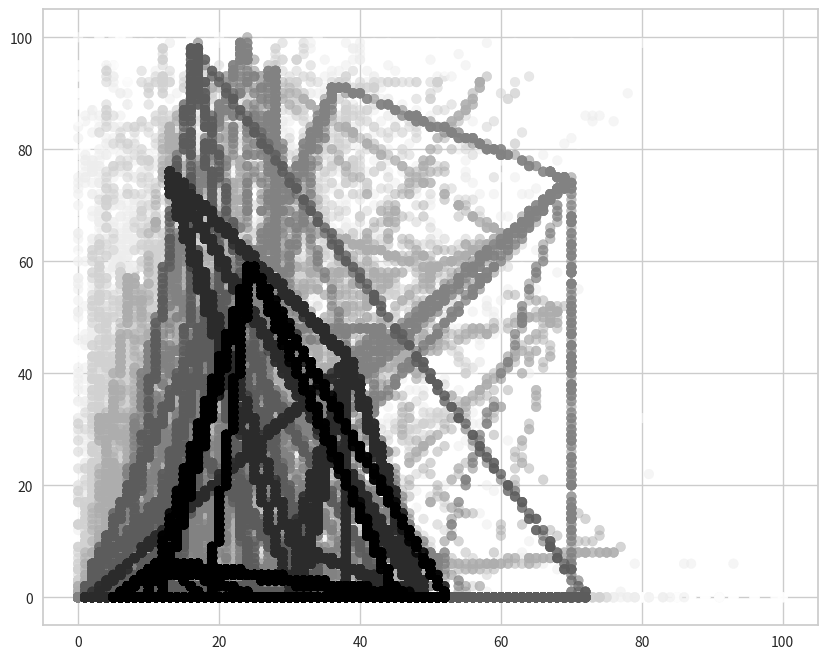

In [17]:
# 데이터 결합 및 산점도 확인
df_resampled = pd.concat([x_resampled,y_resampled], axis=1)
print(df_resampled.head())

# 목표변수 산점도 확인
plt.figure(figsize=(10,8))
plt.scatter(df_resampled['보험료연체율'],df_resampled['신용대출연체율']
            ,c=df_resampled['실효해지건수'],alpha=0.5)
plt.show()

## 모델 생성

In [18]:
# 그래디언트 부스팅 모델 생성: GradientBoostingClassifier
gb_uncustomized = GradientBoostingClassifier(random_state=1234)
gb_uncustomized.fit(df_train_x, df_train_y)
# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(gb_uncustomized.score (df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(gb_uncustomized.score (df_test_x, df_test_y)))

GradientBoostingClassifier(random_state=1234)

Accuracy on training set: 0.823
Accuracy on test set: 0.821


In [19]:
# 실행옵션 확인
print(gb_uncustomized.get_params().keys())
print(gb_uncustomized.get_params().values())

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])
dict_values([0.0, 'friedman_mse', None, 0.1, 'log_loss', 3, None, None, 0.0, 1, 2, 0.0, 100, None, 1234, 1.0, 0.0001, 0.1, 0, False])


In [20]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# learning_rate 학습률 변경: 0.1 ~ 0.9
para_lr = [lr * 0.1 for lr in range(1, 10)]
# para_lr = [lr * 0.02 for lr in range(1, 20)]   # 민감하게 변화하면 0.02 간격으로 확인

for v_learning_rate in para_lr:
    gb = GradientBoostingClassifier(learning_rate = v_learning_rate, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["LearningRate"] = para_lr
df_accuracy_lr["TrainAccuracy"] = train_accuracy
df_accuracy_lr["TestAccuracy"] = test_accuracy

GradientBoostingClassifier(random_state=1234)

GradientBoostingClassifier(learning_rate=0.2, random_state=1234)

GradientBoostingClassifier(learning_rate=0.30000000000000004, random_state=1234)

GradientBoostingClassifier(learning_rate=0.4, random_state=1234)

GradientBoostingClassifier(learning_rate=0.5, random_state=1234)

GradientBoostingClassifier(learning_rate=0.6000000000000001, random_state=1234)

GradientBoostingClassifier(learning_rate=0.7000000000000001, random_state=1234)

GradientBoostingClassifier(learning_rate=0.8, random_state=1234)

GradientBoostingClassifier(learning_rate=0.9, random_state=1234)

In [21]:
# LearningRate별 정확도 테이블
df_accuracy_lr.round(3)

,LearningRate,TrainAccuracy,TestAccuracy
0,0.1,0.823,0.821
1,0.2,0.877,0.873
2,0.3,0.904,0.897
3,0.4,0.918,0.911
4,0.5,0.928,0.921
5,0.6,0.938,0.929
6,0.7,0.942,0.932
7,0.8,0.944,0.935
8,0.9,0.948,0.939


Text(0, 0.5, 'accuracy')

Text(0.5, 0, 'learning rate')

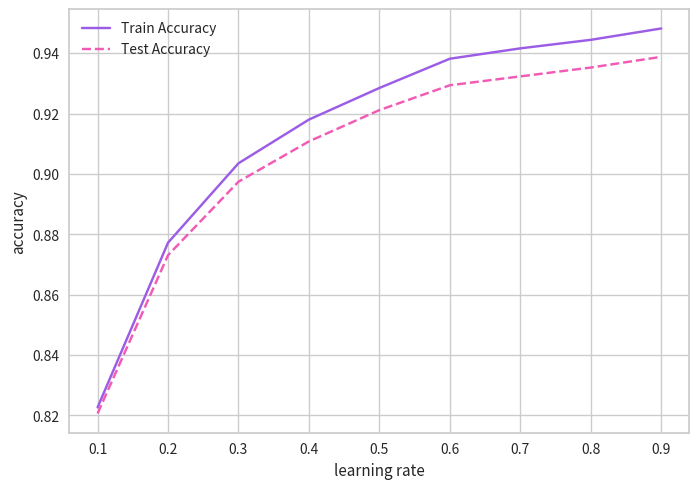

In [22]:
# LearningRate별 정확도 그래프로 확인
plt.plot(para_lr, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_lr, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("learning rate")
plt.legend()

In [23]:
# 학습률 지정
learing_rate = 0.7

In [24]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# n_estimatos: 트리 수 변경: 10~150
para_n_tree = [n_tree * 10 for n_tree in range(1, 16)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingClassifier(n_estimators = v_n_estimators, learning_rate=0.7, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n["Estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

GradientBoostingClassifier(learning_rate=0.7, n_estimators=10,
                           random_state=1234)

GradientBoostingClassifier(learning_rate=0.7, n_estimators=20,
                           random_state=1234)

GradientBoostingClassifier(learning_rate=0.7, n_estimators=30,
                           random_state=1234)

GradientBoostingClassifier(learning_rate=0.7, n_estimators=40,
                           random_state=1234)

GradientBoostingClassifier(learning_rate=0.7, n_estimators=50,
                           random_state=1234)

GradientBoostingClassifier(learning_rate=0.7, n_estimators=60,
                           random_state=1234)

GradientBoostingClassifier(learning_rate=0.7, n_estimators=70,
                           random_state=1234)

GradientBoostingClassifier(learning_rate=0.7, n_estimators=80,
                           random_state=1234)

GradientBoostingClassifier(learning_rate=0.7, n_estimators=90,
                           random_state=1234)

GradientBoostingClassifier(learning_rate=0.7, random_state=1234)

GradientBoostingClassifier(learning_rate=0.7, n_estimators=110,
                           random_state=1234)

GradientBoostingClassifier(learning_rate=0.7, n_estimators=120,
                           random_state=1234)

GradientBoostingClassifier(learning_rate=0.7, n_estimators=130,
                           random_state=1234)

GradientBoostingClassifier(learning_rate=0.7, n_estimators=140,
                           random_state=1234)

GradientBoostingClassifier(learning_rate=0.7, n_estimators=150,
                           random_state=1234)

In [25]:
# n_estimators별 정확도 테이블
df_accuracy_n.round(3)

,Estimators,TrainAccuracy,TestAccuracy
0,10,0.746,0.742
1,20,0.825,0.820
2,30,0.859,0.854
3,40,0.884,0.878
4,50,0.898,0.891
5,60,0.909,0.902
6,70,0.920,0.912
7,80,0.929,0.920
8,90,0.935,0.926
9,100,0.942,0.932


Text(0, 0.5, 'accuracy')

Text(0.5, 0, 'n_estimators')

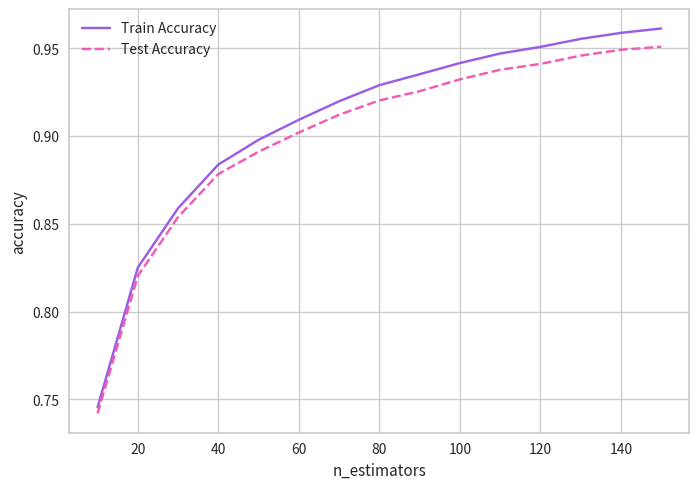

In [26]:
# 정확도를 그래프로 표현
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("n_estimators")
plt.legend()

In [27]:
# 트리 수 지정
n_estimators = 100

In [28]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경. 1~10
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GradientBoostingClassifier(max_depth = v_max_depth,
                                    n_estimators=100, learning_rate=0.1, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

GradientBoostingClassifier(max_depth=1, random_state=1234)

GradientBoostingClassifier(max_depth=2, random_state=1234)

GradientBoostingClassifier(random_state=1234)

GradientBoostingClassifier(max_depth=4, random_state=1234)

GradientBoostingClassifier(max_depth=5, random_state=1234)

GradientBoostingClassifier(max_depth=6, random_state=1234)

GradientBoostingClassifier(max_depth=7, random_state=1234)

GradientBoostingClassifier(max_depth=8, random_state=1234)

GradientBoostingClassifier(max_depth=9, random_state=1234)

GradientBoostingClassifier(max_depth=10, random_state=1234)

In [29]:
# max_depth별 정확도 테이블
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.601,0.599
1,2,0.738,0.737
2,3,0.823,0.821
3,4,0.882,0.878
4,5,0.928,0.921
5,6,0.960,0.952
6,7,0.978,0.970
7,8,0.990,0.980
8,9,0.996,0.985
9,10,0.999,0.988


Text(0, 0.5, 'accuracy')

Text(0.5, 0, 'depth')

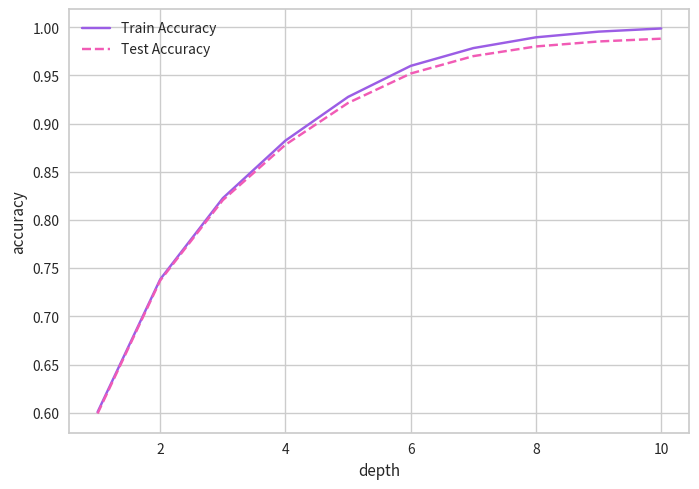

In [30]:
# 정확도를 그래프로 표현
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("depth")
plt.legend()

In [31]:
# 최대 깊이 지정
max_depth = 6

In [32]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_split: 분할하기 위한 노드의 최소 샘플 수. 20~100
para_split = [n_split * 10 for n_split in range(2, 11)]

for v_min_samples_split in para_split:
    gb = GradientBoostingClassifier(min_samples_split = v_min_samples_split,
                                    max_depth=6, n_estimators=100, learning_rate=0.1, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

GradientBoostingClassifier(max_depth=6, min_samples_split=20, random_state=1234)

GradientBoostingClassifier(max_depth=6, min_samples_split=30, random_state=1234)

GradientBoostingClassifier(max_depth=6, min_samples_split=40, random_state=1234)

GradientBoostingClassifier(max_depth=6, min_samples_split=50, random_state=1234)

GradientBoostingClassifier(max_depth=6, min_samples_split=60, random_state=1234)

GradientBoostingClassifier(max_depth=6, min_samples_split=70, random_state=1234)

GradientBoostingClassifier(max_depth=6, min_samples_split=80, random_state=1234)

GradientBoostingClassifier(max_depth=6, min_samples_split=90, random_state=1234)

GradientBoostingClassifier(max_depth=6, min_samples_split=100,
                           random_state=1234)

In [33]:
# min_samples_leaf별 정확도 테이블
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,20,0.958,0.950
1,30,0.958,0.951
2,40,0.959,0.951
3,50,0.958,0.950
4,60,0.958,0.950
5,70,0.959,0.951
6,80,0.959,0.952
7,90,0.958,0.951
8,100,0.958,0.951


Text(0, 0.5, 'accuracy')

Text(0.5, 0, 'min samples split')

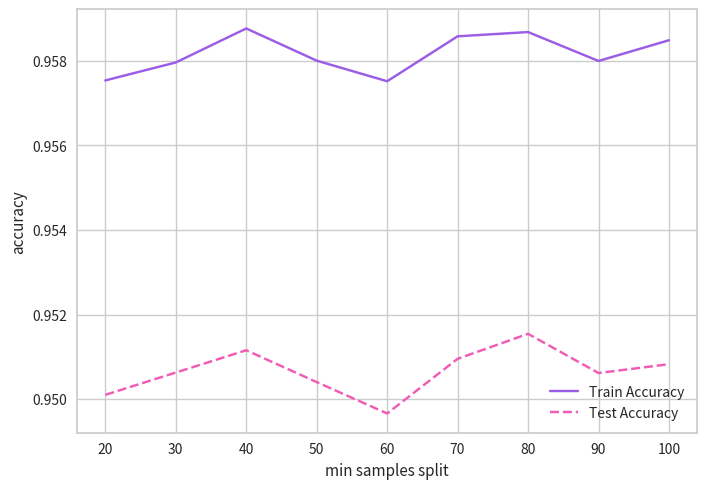

In [34]:
# 정확도를 그래프로 표현
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("min samples split")
plt.legend()

In [35]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_leaf: 잎사귀 노드 최소 자료 수. 5~50
para_leaf = [n_leaf * 5 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingClassifier(min_samples_leaf = v_min_samples_leaf,
                                     max_depth=6, n_estimators=100, learning_rate=0.1, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy


GradientBoostingClassifier(max_depth=6, min_samples_leaf=5, random_state=1234)

GradientBoostingClassifier(max_depth=6, min_samples_leaf=10, random_state=1234)

GradientBoostingClassifier(max_depth=6, min_samples_leaf=15, random_state=1234)

GradientBoostingClassifier(max_depth=6, min_samples_leaf=20, random_state=1234)

GradientBoostingClassifier(max_depth=6, min_samples_leaf=25, random_state=1234)

GradientBoostingClassifier(max_depth=6, min_samples_leaf=30, random_state=1234)

GradientBoostingClassifier(max_depth=6, min_samples_leaf=35, random_state=1234)

GradientBoostingClassifier(max_depth=6, min_samples_leaf=40, random_state=1234)

GradientBoostingClassifier(max_depth=6, min_samples_leaf=45, random_state=1234)

GradientBoostingClassifier(max_depth=6, min_samples_leaf=50, random_state=1234)

In [36]:
# min_samples_leaf별 정확도 테이블
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,5,0.959,0.951
1,10,0.958,0.951
2,15,0.959,0.951
3,20,0.960,0.953
4,25,0.959,0.952
5,30,0.959,0.952
6,35,0.957,0.950
7,40,0.959,0.952
8,45,0.957,0.949
9,50,0.959,0.952


Text(0, 0.5, 'accuracy')

Text(0.5, 0, 'min samples leaf')

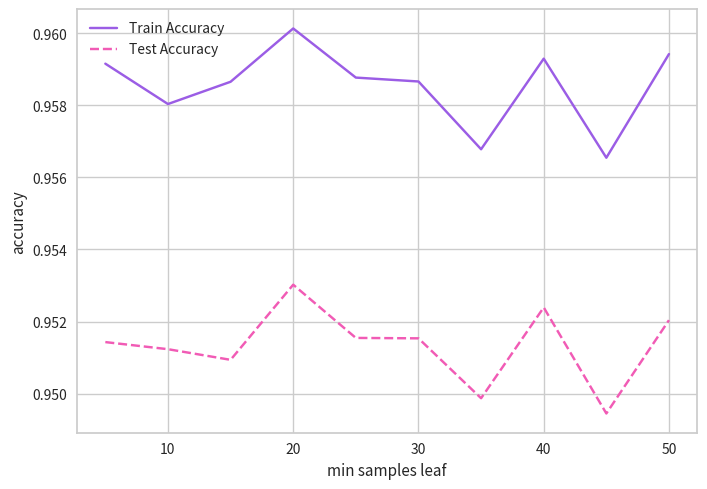

In [37]:
# 정확도를 그래프로 표현
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("min samples leaf")
plt.legend()

In [38]:
# 잎사귀 노드의 최소 자료 수 지정
min_samples_leaf = 15

In [39]:
# 최종 모델
gb_final = GradientBoostingClassifier(min_samples_leaf=15, max_depth=6, n_estimators=100, learning_rate=0.1, 
                                      random_state=1234)
gb_final.fit(df_train_x, df_train_y)
# 예측
y_pred = gb_final.predict(df_test_x)

# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}\n".format(gb_final.score(df_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

GradientBoostingClassifier(max_depth=6, min_samples_leaf=15, random_state=1234)

Accuracy on training set: 0.959
Accuracy on test set: 0.951

Confusion matrix: 
[[21439   110    11     2     3     1     0     0]
 [ 1370 17085  2228   735   124    19     2     3]
 [  260  2185 18421   539   146    15     0     0]
 [   42   264   263 20944    47     6     0     0]
 [    9    32    37     8 21480     0     0     0]
 [    1     0     0     0     0 21565     0     0]
 [    0     0     0     0     0     0 21566     0]
 [    3     0     0     0     0     0     0 21563]]
              precision    recall  f1-score   support

           0      0.927     0.994     0.959     21566
           1      0.868     0.792     0.829     21566
           2      0.879     0.854     0.866     21566
           3      0.942     0.971     0.956     21566
           4      0.985     0.996     0.991     21566
           5      0.998     1.000     0.999     21566
           6      1.000     1.000     1.000     21566
           7      1.000     1.000     1.000     21566

    accuracy           